# **Here in this notebook we are going to overlook a set of data that has "Automobile Dataset" information.**



The data frame for is given by IBM. The columns names are given apart for this proyect.

In [ ]:
# Data web page

filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

col_headers= ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

# Now we call PANDAS to take the information and put it in a data frame structure

import pandas as pd

df= pd.read_csv(filename,names=col_headers)
df


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [ ]:
#Now we need to explore the DF

df.shape
print("This data set has ",df.shape[0],"# of rows and",df.shape[1],"# of columns")

df.dtypes.unique()
print()

print("This are the data types found in the DF:")

for i in df.dtypes.unique():
  print(i)


This data set has  205 # of rows and 26 # of columns

This are the data types found in the DF:
int64
object
float64


**Identify and handle missing values**



In [ ]:
#import numpy to manipulate the data

import numpy as np

# if we observe the column "normalized-losses	" some of its values are "?". This indicate us that they are missing values and must be replace

df.replace(to_replace="?",value=np.nan,inplace=True)

#We use ".isnull" method to overlook the data for null values
df.isnull()

missing_data=df.isnull()


missing_data["make"].value_counts()

col_names= missing_data.columns

#Here we are going to print the values of missing data of each column

for col in col_names:

  result=missing_data[col].value_counts()
  print(col)
  print(result)
  print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

**What we do with missing data?**

A/ One way to replace missing data is filling it with the mean value of the column

In [ ]:

#Normalized-losses 
mean_nl=df["normalized-losses"].astype("float").mean(axis=0)
df["normalized-losses"].replace(np.nan,mean_nl,inplace=True)

#num-of-doors column data are strings so we need to change its value to integers. In this case we use replace the NaN values with the mode of the columns

df["num-of-doors"].unique()
df["num-of-doors"].replace("two",2,inplace=True)
df["num-of-doors"].replace("four",4,inplace=True)
df["num-of-doors"].replace(np.nan,4,inplace=True)




In [ ]:
#The "bore" column data are objects despite its values are seen as numbers

#We need to change its data type to float using pd.numeric method

df["bore"]= df["bore"].apply(pd.to_numeric)

#Here we replace the NaN values

df["bore"].replace(np.nan,df["bore"].mean(),inplace=True)






In [ ]:
#Same procedure with "stroke" column

df["stroke"].unique()

#We need to change its data type to float using pd.numeric method

df["stroke"]= df["stroke"].apply(pd.to_numeric)

#Replace data
df["stroke"].replace(np.nan,df["stroke"].mean(),inplace=True)

df[50:60]

#/////////////////

#horsepower column

df["horsepower"].unique()

#We need to change its data type to float using pd.numeric method

df["horsepower"]= df["horsepower"].apply(pd.to_numeric)

#Replace data
df["horsepower"].replace(np.nan,df["horsepower"].mean(),inplace=True)


#/////////////////

#peak-rpm


#peak-rpm column

df["peak-rpm"].unique()

#We need to change its data type to float using pd.numeric method

df["peak-rpm"]= df["peak-rpm"].apply(pd.to_numeric)

#Replace data
df["peak-rpm"].replace(np.nan,df["peak-rpm"].mean(),inplace=True)



#/////////////////


#price


df["price"].unique()

#We need to change its data type to float using pd.numeric method

df["price"]= df["price"].apply(pd.to_numeric)

#Replace data
df["price"].replace(np.nan,df["price"].mean(),inplace=True)


NOW WE HAVE REPLACE ALL THE MISSING VALUES

-LETS CHECK IT OUT

In [ ]:
for col in col_names:

  result=df[col].isnull().sum()
  print(col)
  print(result)
  print("")

symboling
0

normalized-losses
0

make
0

fuel-type
0

aspiration
0

num-of-doors
0

body-style
0

drive-wheels
0

engine-location
0

wheel-base
0

length
0

width
0

height
0

curb-weight
0

engine-type
0

num-of-cylinders
0

engine-size
0

fuel-system
0

bore
0

stroke
0

compression-ratio
0

horsepower
0

peak-rpm
0

city-mpg
0

highway-mpg
0

price
0



In [ ]:
df.dtypes
#Change the data types of columns

# Till now we have change the data type of some columns. Now we need to check if columns with "object" type are correct

# In case that a column type "Object" is incorrec. We need to change it to a numeric type. In thi case float

#////////

# We only need to change normalized-losses column by now

df["normalized-losses"]= df["normalized-losses"].astype("float")

df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors         float64
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

**NEXT STEP : DATA STANDARDIZATION**

We need to standardize the data so we can easily compara data in a meaningfull way

Some data of the DF is in imperial units. We must create new columns with metric units 

In [ ]:
#The column city-mpg and highway-mpg are subjected to change their units. mpg = Miles per Galo

# We are going to transform the units to liter/100km


df["City-L/100KM"] = 235/df["city-mpg"]
df["City-L/100KM"]

df["Highway-L/100KM"] = 235/df["highway-mpg"]
df["Highway-L/100KM"]

df


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,City-L/100KM,Highway-L/100KM
0,3,122.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122.0,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164.0,audi,gas,std,4.0,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,10.681818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,4.0,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,10.217391,8.392857
201,-1,95.0,volvo,gas,turbo,4.0,sedan,rwd,front,109.1,...,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,12.368421,9.400000
202,-1,95.0,volvo,gas,std,4.0,sedan,rwd,front,109.1,...,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,13.055556,10.217391
203,-1,95.0,volvo,diesel,turbo,4.0,sedan,rwd,front,109.1,...,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,9.038462,8.703704


**Data Normalization**

We need to normalize the data so it would be easier to compare the values of the cars given a parameter.

In [ ]:
#We are going to normalize the following columns in the DF
# "'length', 'width', 'height'"

df["length"]= df["length"]/df["length"].max()

df['width']= df['width']/df['width'].max()

df['height']= df['height']/df['height'].max()



**Binning data**
 
Some of our columns information would be better representes if we separated in groups or put them in "bins".












Text(0.5, 1.0, 'Horsepower data distribution')

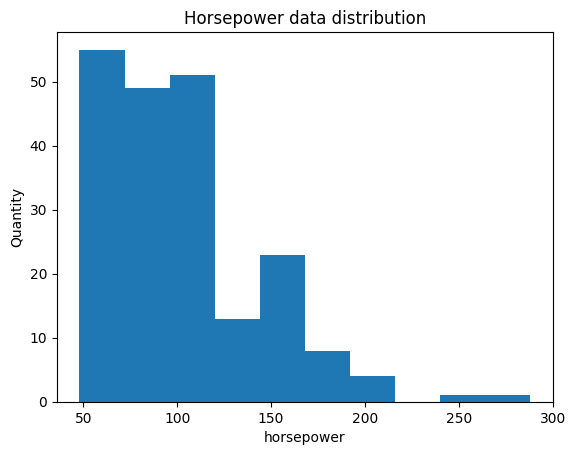

In [ ]:
# In this case we are going to bin the values of the column "horsepower"

# First lets creat  graph to analys the data of horsepower


import matplotlib.pyplot as plt
from matplotlib import pyplot

data=df["horsepower"]

plt.hist(data)

plt.xlabel("horsepower")
plt.ylabel("Quantity")
plt.title("Horsepower data distribution")

In [ ]:
# We can see that the data has three mayor bins. So we should create 3 bins to catalogue our data


#Bins creation
bins= np.linspace(df["horsepower"].min(),df["horsepower"].max(),4)
bins

group_names = ["low","medium","high"]

#lets create the new bin column for horsepower

df["bin-horsepower"]=pd.cut(df["horsepower"],bins,labels=group_names)
df["bin-horsepower"]



0         low
1         low
2      medium
3         low
4         low
        ...  
200       low
201    medium
202    medium
203       low
204       low
Name: bin-horsepower, Length: 205, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

**# Create dummies variables for columns with categorical data**

**Why we need to do this?**

A/ Given that if we want to do a model that predicts the price of a car, the categorical data wont be usefull. So we need to create dummy variables to asign a number to the categories.

In [ ]:
# 'fuel-type' column transformation to dummies

df.columns


fuel_type_dummy= pd.get_dummies(df["fuel-type"])

fuel_type_dummy
#change column names

fuel_type_dummy.rename(columns={"diesel":"fuel-diesel","gas":"fuel-gas"},inplace=True)
fuel_type_dummy

#Now we need to add the new columns to the DF
fuel_type_dummy


df=pd.concat([df,fuel_type_dummy], axis=1)

df.drop(columns="fuel-type",inplace=True)
df["aspiration"]


# Repeat the code for the other category columns


#///////////////////////////////



0        std
1        std
2        std
3        std
4        std
       ...  
200      std
201    turbo
202      std
203    turbo
204    turbo
Name: aspiration, Length: 205, dtype: object

In [ ]:

# Repeat the code for the other category columns


#///////////////////////////////

df["aspiration"]

aspiration_dummy= pd.get_dummies(df["aspiration"])
aspiration_dummy

#change column names
aspiration_dummy.rename(columns={"std":"std-asp","turbo":"turbo-asp"},inplace=True)
aspiration_dummy

#Now we need to add the new columns to the DF



df=pd.concat([df,aspiration_dummy], axis=1)

df.drop(columns="aspiration",inplace=True)



**END OF OF DATA CLEANING**

-EXPORT DF to csv file

In [ ]:
df.to_csv("end.csv")

from google.colab import files
files.download("end.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# DATA ANALYSIS WITH PYTHON

Now we are going to explore the data to find correlations between its parameters 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


In [ ]:
corr=df.corr()
corr["price"]
#Observing the correlation matrix , we can observe that the parameters length(0.68), width(),curb-weight(),engine-size  ,horsepower()and city-mpg ()



symboling           -0.082201
normalized-losses    0.133999
num-of-doors         0.041945
wheel-base           0.583168
length               0.682986
width                0.728699
height               0.134388
curb-weight          0.820825
engine-size          0.861752
bore                 0.532300
stroke               0.082095
compression-ratio    0.070990
horsepower           0.757917
peak-rpm            -0.100854
city-mpg            -0.667449
highway-mpg         -0.690526
price                1.000000
City-L/100KM         0.770411
Highway-L/100KM      0.789346
fuel-diesel          0.110207
fuel-gas            -0.110207
std-asp             -0.177285
turbo-asp            0.177285
Name: price, dtype: float64

<Axes: xlabel='engine-size', ylabel='price'>

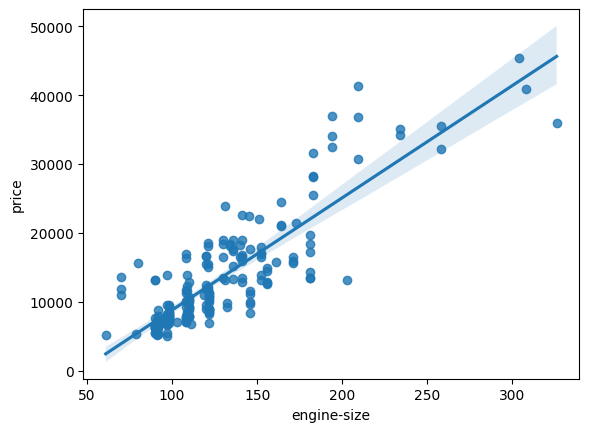

In [ ]:
# screating regresion plots to observe data behavior

import seaborn as sns

#Creating regresion plot
sns.regplot(x="engine-size",y="price",data=df)

<Axes: xlabel='city-mpg', ylabel='price'>

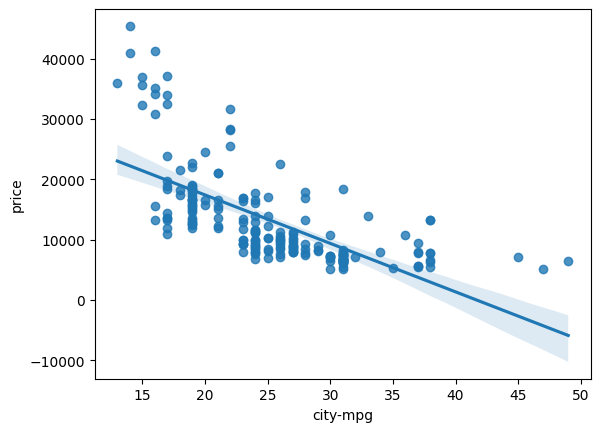

In [ ]:
# Lets observe a negative correlation with city-mpg
#Creating regresion plot
sns.regplot(x="city-mpg",y="price",data=df)

**Lets check categorical parameters**

We are going to use box plots to see if there is a pattern that in the bar graphs that tell us a correlation of price with thi categorical data


<Axes: xlabel='body-style', ylabel='price'>

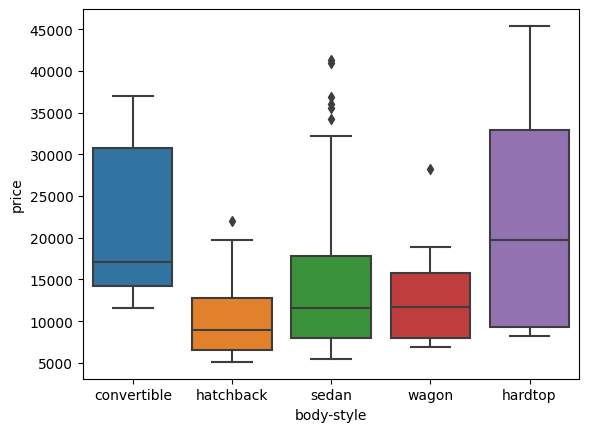

In [ ]:
#body-style
sns.boxplot(x="body-style",y="price", data=df)

# We can see that body-style categories doesnt show a trend in the price of the cars

<Axes: xlabel='engine-location', ylabel='price'>

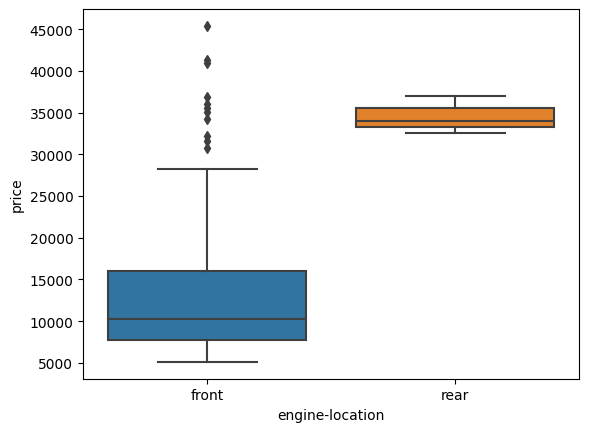

In [ ]:
df.dtypes

#Engine location
sns.boxplot(x="engine-location",y="price", data=df)

# We can se a perfect trend with engine location. Having teh engine in the front will normally be related to a lower price
# In the other case a engine in the rear are is concentrated in higher prices




<Axes: xlabel='drive-wheels', ylabel='price'>

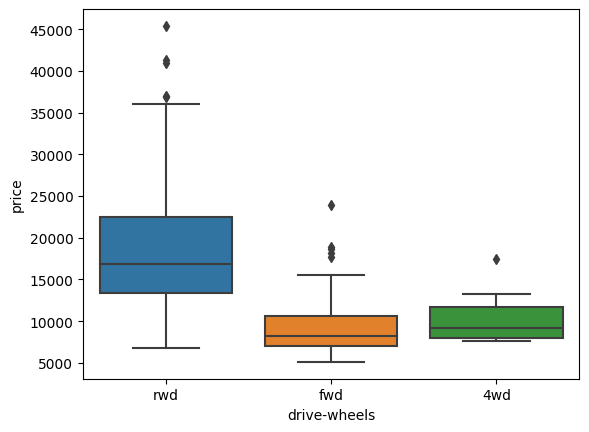

In [ ]:
#drive-wheels

sns.boxplot(x="drive-wheels",y="price", data=df)

# It is relevant to say that drive-wheels is also a great parameter for price prediction

**DESCRIPTIVE STATISCTICAL ANALYSIS**

In [ ]:
#Data description for categorical data
df.describe()

df.describe(include=["object"])

,make,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,205,205,205,205,205,205,205
unique,22,5,3,2,7,7,8
top,toyota,sedan,fwd,front,ohc,four,mpfi
freq,32,96,120,202,148,159,94


**DATA GROUPING**

To continue exploring the relationship between categorical data and price, we should group the data to observe how the price varies.

In [ ]:
# The three parametes to group are body-style, engine-location,drive-wheels 

group= df[["body-style","engine-location","drive-wheels","price"]]
group

# Now let group the data

info1= group.groupby(["body-style"],as_index=False).mean()
info1

#The hardtop body style shows the higher mean prices




,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,10050.289410
3,sedan,14433.658945
4,wagon,12371.960000


In [ ]:
info2= group.groupby(["engine-location"],as_index=False).mean()
info2

# W can confirm that rear end engine location shows higher prices

,engine-location,price
0,front,12890.482759
1,rear,34528.000000


In [ ]:
info3= group.groupby(["drive-wheels"],as_index=False).mean()
info3

#rear wheel drive (rwd) shows in average that that are the cars with higher prices

,drive-wheels,price
0,4wd,10570.569928
1,fwd,9310.818823
2,rwd,19671.422755


In [ ]:
#We are going to group by all the categorical parameters that we have been using

info4= group.groupby(["body-style","engine-location","drive-wheels"],as_index=False).mean()

# we want to see the most average expensive combination


print(info4.max())

#it is wagon /engine in rear end / Rear-wheel drive (RWD)



body-style           wagon
engine-location       rear
drive-wheels           rwd
price              37028.0
dtype: object


In [ ]:
info5= group.groupby(["body-style","drive-wheels"],as_index=False).mean()
info5

,body-style,drive-wheels,price
0,convertible,fwd,11595.000000
1,convertible,rwd,23949.600000
2,hardtop,fwd,8249.000000
3,hardtop,rwd,24202.714286
4,hatchback,4wd,10405.064677
5,hatchback,fwd,8396.387755
6,hatchback,rwd,14278.269966
7,sedan,4wd,12647.333333
8,sedan,fwd,9930.934363
9,sedan,rwd,21711.833333


In [ ]:

# we create a pivot table to use it for better analysis and charts
pivot=info5.pivot(index="drive-wheels",columns="body-style")
pivot
# we need to replace NaN values of the pivot table
pivot=pivot.fillna(0)
pivot



price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000  10405.064677  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9930.934363   
rwd              23949.6  24202.714286  14278.269966  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

**Graphical visualization**

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pyplot

*Lets create a heat map to compare body style vs drive-wheels*

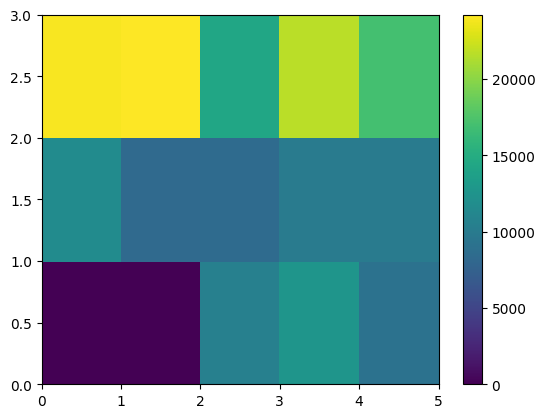

In [ ]:
#here we are going to create a heat map

plt.pcolor(pivot)
plt.colorbar()
plt.show()

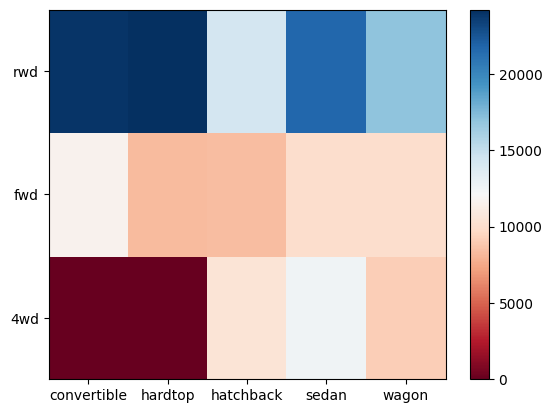

In [ ]:
fig, ax = plt.subplots()
im = ax.pcolor(pivot, cmap='RdBu')


#label names
row_labels = pivot.columns.levels[1]
col_labels = pivot.index


#move ticks and labels to the center
ax.set_xticks(np.arange(pivot.shape[1])+0.5)
ax.set_yticks(np.arange(pivot.shape[0])+0.5)



#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)


fig.colorbar(im)

**CORRELATION VS CAUSATION**

In [ ]:
# WE WOULD SEE THE DIFFERENCE BETWEEN correlation and causation

# This wuld tell us if a parameter is real causing to the price to increase or decrease

AB=df.corr()
AB["price"]

symboling           -0.082201
normalized-losses    0.133999
num-of-doors         0.041945
wheel-base           0.583168
length               0.682986
width                0.728699
height               0.134388
curb-weight          0.820825
engine-size          0.861752
bore                 0.532300
stroke               0.082095
compression-ratio    0.070990
horsepower           0.757917
peak-rpm            -0.100854
city-mpg            -0.667449
highway-mpg         -0.690526
price                1.000000
City-L/100KM         0.770411
Highway-L/100KM      0.789346
fuel-diesel          0.110207
fuel-gas            -0.110207
std-asp             -0.177285
turbo-asp            0.177285
Name: price, dtype: float64

In [ ]:
# to see causation we should import some scipy

from scipy import stats

In [ ]:
#Wheel-base
df["wheel-base"]

pearson_coef,p_value= stats.pearsonr(df["wheel-base"],df["price"])

print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

#We can see that the causation is strong but a medium correlation


The Pearson Correlation Coefficient is 0.5831681499789549  with a P-value of P = 4.5276255456863486e-20


In [ ]:

#length
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

#We can see that the causation is strong but a moderated correlation

The Pearson Correlation Coefficient is 0.6829862954386219  with a P-value of P =  1.6498873291217237e-29


In [ ]:
#width

pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

#We can see that the causation is strong and a better  correlation

The Pearson Correlation Coefficient is 0.7286988175931837  with a P-value of P = 3.214520483804688e-35


In [ ]:
#curb-height

pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

#another example of strong causation and a better  correlation

The Pearson Correlation Coefficient is 0.8208247333547288  with a P-value of P =  2.866332107027043e-51


In [ ]:

#Engine size
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.861752243685972  with a P-value of P = 9.669661923636075e-62


In [ ]:
#bore
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5323000195387406  with a P-value of P =   2.139830651285502e-16


In [ ]:
#city-mpg

pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  



The Pearson Correlation Coefficient is -0.6674492651600004  with a P-value of P =  8.463700497727325e-28


In [ ]:
#highway-mpg
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is -0.6905257341183487  with a P-value of P =  2.2324674058372918e-30


# **CONCLUSION**

NWe have finished our data analysis of the car prices. We have observe which parameters have real effect in the price